In [14]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from main import load_img
import main as m

In [3]:
image = load_img("data/good_condensates.tif")

<tifffile.TiffFile 'good_condensates.tif'> OME series expected 1 frames, got 2
<tifffile.TiffFile 'good_condensates.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))


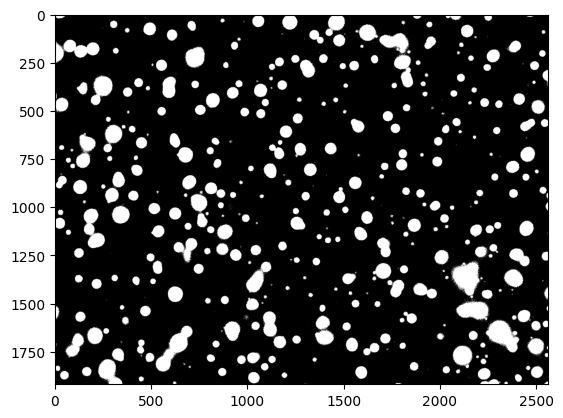

In [15]:
thresh = m.threshold_via_otsu(image)
m.display(thresh)

In [16]:
contours = ski.measure.find_contours(thresh, 0.8)

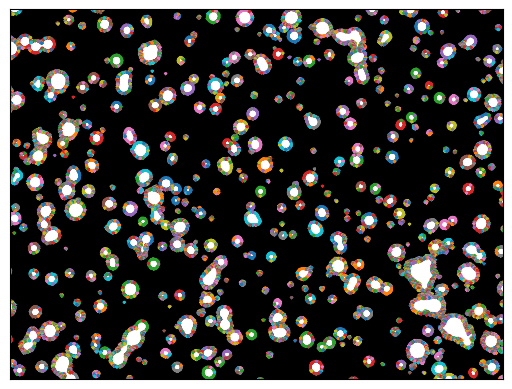

In [18]:
fig, ax = plt.subplots()
ax.imshow(thresh, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

In [20]:
labels =